In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
# helper cell to save some frames of a video
import cv2
video_path = './data/cube.mp4'
cap = cv2.VideoCapture(video_path)

ret, frame = cap.read()
frame_name = "frame1.jpg"
cv2.imwrite(frame_name, frame)

ret, frame = cap.read()
frame_name = "frame2.jpg"
cv2.imwrite(frame_name, frame)

ret, frame = cap.read()
frame_name = "frame3.jpg"
cv2.imwrite(frame_name, frame)

ret, frame = cap.read()
frame_name = "frame4.jpg"
cv2.imwrite(frame_name, frame)

ret, frame = cap.read()
frame_name = "frame5.jpg"
cv2.imwrite(frame_name, frame)

cap.release()
cv2.destroyAllWindows()


# Object Tracking using Lucas Kanade Optical Flow

In [5]:
cap = cv.VideoCapture('./data/carchase.mp4') 

points0 = np.array((200,106)).reshape(-1,1,2).astype(np.float32)
winSize = (21,21) # size of the window for lucas kanade

ret, frame = cap.read() 

gray0 = cv.cvtColor(frame, cv.COLOR_BGR2GRAY) 

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray1 = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)     
    points1, status, err = cv.calcOpticalFlowPyrLK(gray0, gray1, points0, None, winSize=winSize, maxLevel=3) 
    
    # Select good points 
    points0 = points0[status == 1] 
    points1 = points1[status == 1] 
    
    # display a line between old position and new position of the points
    for i, (p0, p1) in enumerate(zip(points0, points1)):
        frame = cv.rectangle(frame, p1.astype(int)-winSize[0]//2,
                             p1.astype(int)+winSize[0]//2, [0,0,255], 2) 
    
    cv.imshow('frame', frame)
    
    if cv.waitKey(1) == ord('q'):
        break
    gray0 = gray1
    points0 = points1.reshape(-1,1,2)


cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...


# Multiobject tracking using Lucas Kanade Optical Flow

In [6]:
cap = cv.VideoCapture('./data/people.mp4') 

n = 100 # number of points to track
winSize = (15,15) # size of the window for lucas kanade

ret, frame = cap.read() 
gray0 = cv.cvtColor(frame, cv.COLOR_BGR2GRAY) 
# mask: region where points are detected, minDistance: min distance between points

points = cv.goodFeaturesToTrack(gray0, maxCorners=n, qualityLevel=0.1, minDistance=7) 

color = np.random.randint(0, 255, (n, 3)) 

points0 = points
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray1 = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)     
    points1, status, err = cv.calcOpticalFlowPyrLK(gray0, gray1, points0, None, winSize=winSize, maxLevel=3) 
    
    # Select good points 
    points0 = points0[status == 1] 
    points1 = points1[status == 1] 
    points = points[status == 1] 
    color = color.reshape(-1,1,3)[status==1]
    # display a line between old position and new position of the points
    for i, (p0, p1) in enumerate(zip(points, points1)):
        frame = cv.line(frame, p0.astype(int), p1.astype(int), color[i].tolist(),2)
        frame = cv.rectangle(frame, p1.astype(int)-winSize[0]//2,
                             p1.astype(int)+winSize[0]//2, color[i].tolist(), 2) 
    
    cv.imshow('frame', frame)
    
    if cv.waitKey(1) == ord('q'):
        break
    gray0 = gray1
    points0 = points1.reshape(-1,1,2)
    points = points.reshape(-1,1,2)


cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...


# Dense Optical Flow

In [8]:
frame1 = cv.imread('./data/frame1.jpg', cv.IMREAD_GRAYSCALE) 
frame2 = cv.imread('./data/frame5.jpg', cv.IMREAD_GRAYSCALE) 

flow = cv.calcOpticalFlowFarneback(frame1, frame2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

(-0.5, 337.5, 639.5, -0.5)

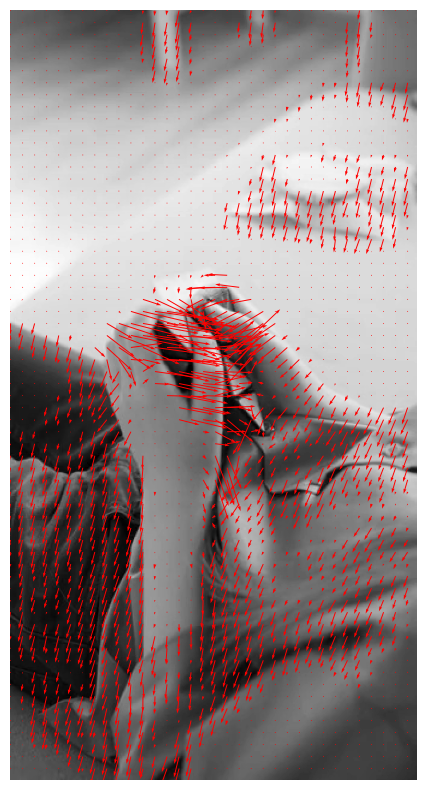

In [9]:
plt.figure(figsize=(20,10))
plt.imshow(frame1, cmap='gray')
plt.quiver(range(0, flow.shape[1], 10), 
           range(0, flow.shape[0], 10), 
           flow[::10, ::10, 0], 
           flow[::10, ::10, 1], scale=100,color='r')
plt.axis('off')